<h1>Initialization</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

In [3]:
df = pd.read_csv("../datasets/dataset_salaries.csv")

df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [4]:
df.shape

(62642, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62527 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  int64  
 7   yearsatcompany           62642 non-null  int64  
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  int64  
 11  bonus                    62642 non-null  int64  
 12  gender                   43102 non-null  object 
 13  otherdetails             40139 non-null  object 
 14  cityid                

In [6]:
df.describe(include="all")

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62637,62527,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,43102,40139,62642.000000,62640.000000,62642.000000
unique,62561,1869,3071,15,NaN,1050,NaN,NaN,3271,NaN,NaN,NaN,4,40132,NaN,NaN,NaN
top,1/10/2019 21:44:02,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,twauesly,NaN,NaN,NaN
freq,3,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,9856.201989,616.097222,41694.723732
std,NaN,NaN,NaN,NaN,3.877877e+04,NaN,6.437148,3.524030,NaN,1.927194e+04,2.520611e+04,3709.187697,NaN,NaN,6679.104563,289.843390,24488.865879
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,7369.000000,506.000000,20069.250000
50%,NaN,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,7839.000000,807.000000,42019.000000
75%,NaN,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,11521.000000,807.000000,63021.750000


<h1>Data Cleaning</h1>

<h2>Timestamp</h2>
<p>There are many unique values for timestamp. Using specific dates and time is only adding more complexity to the data.</p>
<p>An alternative to this is doing a model per year which will be more accurate. The stackoverflow salary calculator implementation also did it per year.</p>

In [7]:
df.drop("timestamp", axis=1, inplace=True)

<h2> Years of Experience vs Years at Company </h2>

<p>From looking at the data, I noticed that some of the yearsofexperience is greater than yearsatcompany.</p>
<p>The data itself is useful and doesn't need to be dropped. There are also 5000+ rows so it is a lot of data to just drop. Here I am making the assumption that they managed to switch it around, so that yearsofexperience was supposed to be yearsatcompany</p>

In [8]:
df[df["yearsofexperience"] < df["yearsatcompany"]]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
15,Amazon,L5,Software Engineer,60,"Chennai, TN, India",5,6,Testing (SDET),41,19,0,Male,viaocy phaofy,13147,0.0,71422
20,Texas Instruments,L1,Hardware Engineer,131,"Santa Clara, CA",3,4,Quality Assurance,120,0,11,NaN,hroiaks segh xaic creolly diak,7434,807.0,80394
50,Microsoft,62,Solution Architect,96,"Redmond, WA",7,15,Web Development (Front-End),70,12,14,Male,NaN,11521,819.0,7691
68,Western Digital,Senior,Software Engineer,97,"Irvine, CA",3,6,embedded,64,20,13,NaN,mckuend speeys traf thioully raink kluont schr...,7229,803.0,75044
75,Veritas Technologies,Senior SWE,Software Engineer,169,"Santa Clara, CA",3,5,Distributed Systems (Back-End),160,0,9,Male,NaN,7434,807.0,11152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62561,IBM,Band 7,Software Engineer,159,"Austin, TX",1,3,Web Development (Front-End),159,0,0,Female,swiosts,10965,635.0,51730
62568,Intel,Grade 6,Hardware Engineer,133,"Santa Clara, CA",2,4,Verification Engineer,122,4,7,Male,sluld khauecks schnuerty sweiaf chaiancy thuad...,7434,807.0,29484
62596,Facebook,E5,Software Engineer,323,"Menlo Park, CA",4,6,ML / AI,203,85,35,Female,feonds mckeep spuols sqeirn sraord shroig cria...,7300,807.0,74029
62620,VMware,P7,Software Engineer,321,"London, EN, United Kingdom",17,18,Distributed Systems (Back-End),157,120,44,Male,pfueys rhept tweiny physaasts phiary flal paiarr,12008,0.0,26286


In [9]:
df[['yearsofexperience','yearsatcompany']]

# swap the data where years of experience are less than years at company
df[['yearsofexperience','yearsatcompany']] = df[['yearsatcompany','yearsofexperience']].where(df["yearsofexperience"] < df["yearsatcompany"], df[['yearsofexperience','yearsatcompany']].values)

<h2>Gender</h2>
<p>
Gender displays "Title: Senior Software Engineer", which isn't a valid gender.
Not deleting as the data is useful, I will just set it to NaN
</p>

In [10]:
df["gender"].unique()

array(['Male', nan, 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [11]:
df[df["gender"] == "Title: Senior Software Engineer"]

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
14857,GitHub,E4,Software Engineer,217,"Buda, TX",14,6,Distributed Systems (Back-End),200,16,1,Title: Senior Software Engineer,NaN,12858,635.0,14977


In [12]:
df["gender"] = df["gender"].replace("Title: Senior Software Engineer", np.NaN)

<p>
    Here I am dropping bonus and stockgrantvalue as they are extras to employees and completely based on the company they work for. 
    
totalyearlycompensation contains basesalary so we are removing that as it has a very high correlation with basesalary as totalyearlycompensation contains basesalary.
    
rowid, cityid, dmaid are all unique identifiers which can be removed safely and add nothing to the prediction.
    
dmaid is also being dropped as it is strictly an identifier for US and Canada values only
</p>


In [13]:
df.drop("bonus", axis=1, inplace=True)
df.drop("cityid", axis=1, inplace=True)
df.drop("rowNumber", axis=1, inplace=True)
df.drop("totalyearlycompensation", axis=1, inplace=True)
df.drop("stockgrantvalue", axis=1, inplace=True)
df.drop("otherdetails", axis=1, inplace=True)
df.drop("dmaid", axis=1, inplace=True)

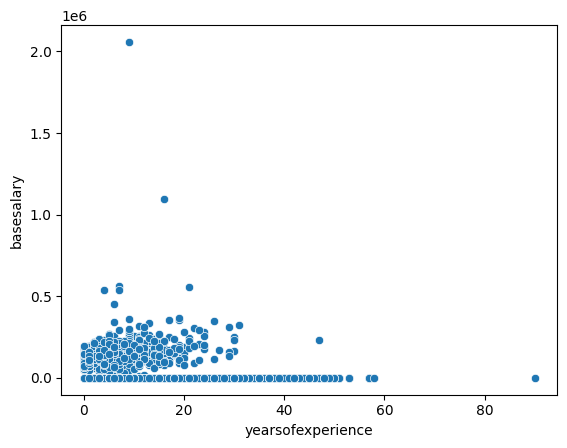

In [14]:
plot = scatterplot(x="yearsofexperience", y="basesalary", data=df)

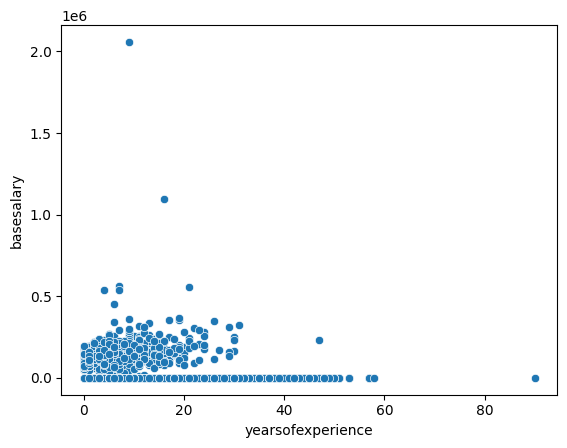

In [15]:
plot = scatterplot(x="yearsofexperience", y="basesalary", data=df)

In [16]:
# Delete examples where flarea, devment or price are NaN
df.dropna(subset=["level", "company", "tag"], inplace=True)

# deleting the rows where salary is 0 and have a very high salary (more than 5 million) as it will mess up the mean
df = (df[(df["basesalary"] >0) & (df["basesalary"]<1000)]).copy()

# 90 years at a company doesn't sound like a normal human being
df = (df[df["yearsatcompany"] <90]).copy()

# most people work in their 20s and retire in their 60s so I am setting 40 years as the limit
df = (df[df["yearsofexperience"]<40]).copy()

# outlier that has a large number yearsofexperience and a low base salary
df = (df[(df["yearsofexperience"]<30) & (df["basesalary"]>20)]).copy()

In [17]:
# df[df["yearsatcompany"] >50]

df.reset_index(drop=True, inplace=True)
df.shape

(57788, 9)

<h1>Refactoring "level" </h1>

In [18]:
df["level"].unique()
df["level"] = df["level"].str.lower()

<p>
One of the approaches I was thinking was to refactor the data. 
From above, we can see there are over 3000 unique values for levels in each company.

If I did this, it would be very time consuming, but it can lessen the complexity of the data and make it easier to analyze.
    
The example below is how I would refactor the data into groups of software levels based on the site levels.fyi
</p>

In [19]:
# conditions_level = [(df['level'].str.contains("E3")) |
#                     df[df["level"] == ("SDE I")] |
#                     df[df["level"] == ("502")] |
#                     df[df["level"] == ("ICT2")]
#                     ,
#                     df[df["level"] == ("601")] |
#                     df[df['level'] == ("60")] |
#                     df[df['level'] == ("SDE II")] |
#                     df[df['level'] == ("62")]
#                     ...,
#                     df[df["level"]== ("L10")]
#                    ]

# choices_level = ['Entry Level Engineer', 'Software Engineer' ... , "Distinguished Engineer"]

# df['level'] = np.select(conditions_level, choices_level, default = np.NaN)

<p>
    Here I am refactoring some of the labels, excluding the top company specific ones like Google's (L1-L10), to lessen the unique values for level. I am ignoring the other companies as they can be categorized later</p>
    <p>The labels for the values are taken from levels.fyi</p>


In [20]:
# in the next two cells I was going to simplify the level by leaving the levels of the top companies and simplifying all the
# other companies
# df[~df["company"].isin(["amazon", "google", "apple", "netflix", "facebook", "microsoft", "paypal"])]["company"]


In [21]:
# def changelevel(level):
#     junior =  ["entry", "junior", "associate"]
#     senior = ["senior", "sr", "principal", "staff", "principal", "distinguished", "fellow", "lead"]
    
#     for s in senior:
#         if s in level.lower():
#             return("senior")
#     for j in junior:
#         if j in level.lower():
#             return("junior")
#     return(np.NaN)

# df["level"] = df[~df["company"].isin(["amazon","google","apple","netflix","facebook","microsoft"])]["level"].apply(changelevel)


In [22]:
df.loc[df["level"].str.contains("Entry"), "level"] = "Entry Level Engineer"
df.loc[df["level"].str.contains("Senior"), "level"] = "Senior Engineer"
df.loc[df["level"].str.contains("Staff"), "level"] = "Staff Engineer"
df.loc[df["level"].str.contains("Principal"), "level"] = "Principal Engineer"
df.loc[df["level"].str.contains("Distinguished"), "level"] = "Distinguished Engineer"
df.loc[df["level"].str.contains("Fellow"), "level"] = "Distinguished Engineer"



<h1>Tag Values</h1>
<p>Making sure tag values are case-insensitive and duplicates are refactored.</p>
<p>I was thinking of refactoring tags to certain labels such as "front-end" or "back-end" to be more specific but for specific technologies it will be more accurate to leave it as it is</p>


In [23]:
df["tag"] = df["tag"].str.lower()
df["tag"] = df["tag"].str.replace(" ", "")
df["tag"].unique()
df.loc[df["tag"].str.contains("back-end"), "tag"] = "back-end"
df.loc[df["tag"].str.contains("front-end"), "tag"] = "front-end"
df.loc[df["tag"].str.contains("machine"), "tag"] = "ml/ai"
df.loc[df["tag"].str.contains("artificial"), "tag"] = "ml/ai"
df.loc[df["tag"].str.contains("qa"), "tag"] = "qa/test"
df.loc[df["tag"].str.contains("test"), "tag"] = "qa/test"
df.loc[df["tag"].str.contains("mobile"), "tag"] = "mobile"
df.loc[df["tag"].str.contains("full"), "tag"] = "fullstack"
df.loc[df["tag"].str.contains("database"), "tag"] = "databaseadmin"
df.loc[df["tag"].str.contains("data"), "tag"] = "datascientist"
df.loc[df["tag"].str.contains("embedded"), "tag"] = "embedded"
df.loc[df["tag"].str.contains("system"), "tag"] = "systems"
df.loc[df["tag"].str.contains("desktop"), "tag"] = "desktop"
df.loc[df["tag"].str.contains("designer"), "tag"] = "designer"
df.loc[df["tag"].str.contains("game"), "tag"] = "gamedev"

df["tag"].unique()

array(['ml/ai', 'back-end', 'fullstack', ..., 'hardwareapps',
       'creativeshop', 'engops'], dtype=object)

<h1>Company Values</h1>
<p>Making sure company values are case-insensitive and duplicates are refactored</p>

In [24]:
df["company"] = df["company"].str.lower()
df["company"] = df["company"].str.replace(" ", "")


In [25]:
df["title"].unique()

array(['Data Scientist', 'Software Engineer', 'Management Consultant',
       'Marketing', 'Hardware Engineer', 'Human Resources',
       'Product Manager', 'Business Analyst', 'Product Designer',
       'Recruiter', 'Solution Architect', 'Technical Program Manager',
       'Software Engineering Manager', 'Mechanical Engineer', 'Sales'],
      dtype=object)

<h1>Highest paying states in US</h1>

<p>Here I am just refactoring the highest paying states in America.</p>

In [26]:
df.loc[df["location"].str.contains("CA"), "location"] = "California"
df.loc[df["location"].str.contains("WA"), "location"] = "Washington"
df.loc[df["location"].str.contains("NY"), "location"] = "New York"
df.loc[df["location"].str.contains("CO"), "location"] = "Colorado"

<h1>Feature Selection</h1>

In [60]:
features = ["company", "level", "title", "location", "yearsofexperience", "yearsatcompany", "tag", "gender"]
numeric_features = ["yearsofexperience", "yearsatcompany"]
nominal_features = ["company", "level", "title", "location", "tag", "gender"]

<h1>Creating test set</h1>

In [28]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h1>Dataset Exploration</h1>

In [29]:
copy_df = dev_df.copy()

In [30]:
# yearsofexperience has an average correlation with basesalary
copy_df.corr()

C:\Users\adria\AppData\Local\Temp\ipykernel_7904\780852012.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,yearsofexperience,yearsatcompany,basesalary
yearsofexperience,1.000000,0.528177,0.301588
yearsatcompany,0.528177,1.000000,0.138843
basesalary,0.301588,0.138843,1.000000


C:\Users\adria\AppData\Local\Temp\ipykernel_7904\1123110122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(copy_df.corr(), annot=True)


<AxesSubplot: >

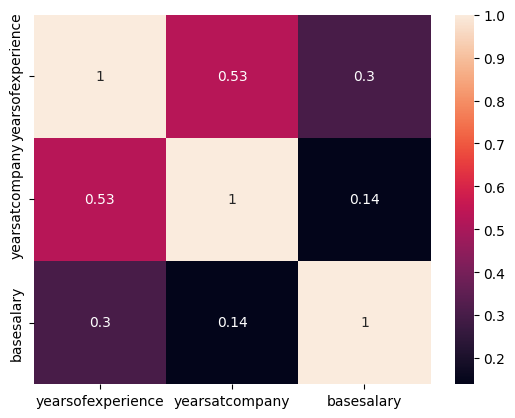

In [31]:
heatmap(copy_df.corr(), annot=True)

<h1>Adding 'Country' as a Feature to replace "Location"</h1>
<p>I excluded this as I tried grouping the data's location into countries but this lead to inaccuracies when a city in a said country is paid more than another city in the same country.</p>

In [32]:
# here I am just checking how countries are listed, as my implementation uses location as a big factor
# copy_df["location"].head()

In [33]:
# this gets all the data of only United States
# location is a big factor in finding the base salary for the developers
# if we compare US and India for the same roles, they'd have a large difference in base salaries

# onlyUS = df[~df["location"].str.contains("^([^,]*,[^,]*),.*", regex=True)].copy()

# Reset the index

# onlyUS.reset_index(drop=True, inplace=True)

# onlyUS.shape

# this will provide a more accurate model for predicting salaries but the models will vary for country to country
# a downside to this is how much data we have for each country

In [34]:
# onlyUS.describe(include="all")

In [35]:
# otherCountries = df[df["location"].str.contains("^([^,]*,[^,]*),.*", regex=True)].copy()
# otherCountries

In [36]:
# df["country"] = (otherCountries["location"].str.split(", ").str[2])
# df["country"] = df["country"].replace(np.NaN, "United States")

# df.describe(include="all")

In [37]:
# class InsertCountry(BaseEstimator, TransformerMixin):

#     def __init__(self, insert=True):
#         self.insert = insert
        
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X, y=None):
#         if self.insert:
#             X["country"] = (otherCountries["location"].str.split(", ").str[2])
#             X["country"] = X["country"].replace(np.NaN, "United States")
    
#         return X

In [38]:
copy_df.describe(include="all")

,company,level,title,location,yearsofexperience,yearsatcompany,tag,basesalary,gender
count,46230,46230,46230,46230,46230.000000,46230.000000,46230,46230.000000,32384
unique,1096,2269,15,763,NaN,NaN,1872,NaN,3
top,amazon,l4,Software Engineer,California,NaN,NaN,back-end,NaN,Male
freq,5903,3791,30432,16821,NaN,NaN,12778,NaN,26753
mean,NaN,NaN,NaN,NaN,7.200087,2.412265,NaN,142.703612,NaN
std,NaN,NaN,NaN,NaN,5.996096,2.987082,NaN,69.325377,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,21.000000,NaN
25%,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,94.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN,134.000000,NaN
75%,NaN,NaN,NaN,NaN,10.000000,3.000000,NaN,182.000000,NaN


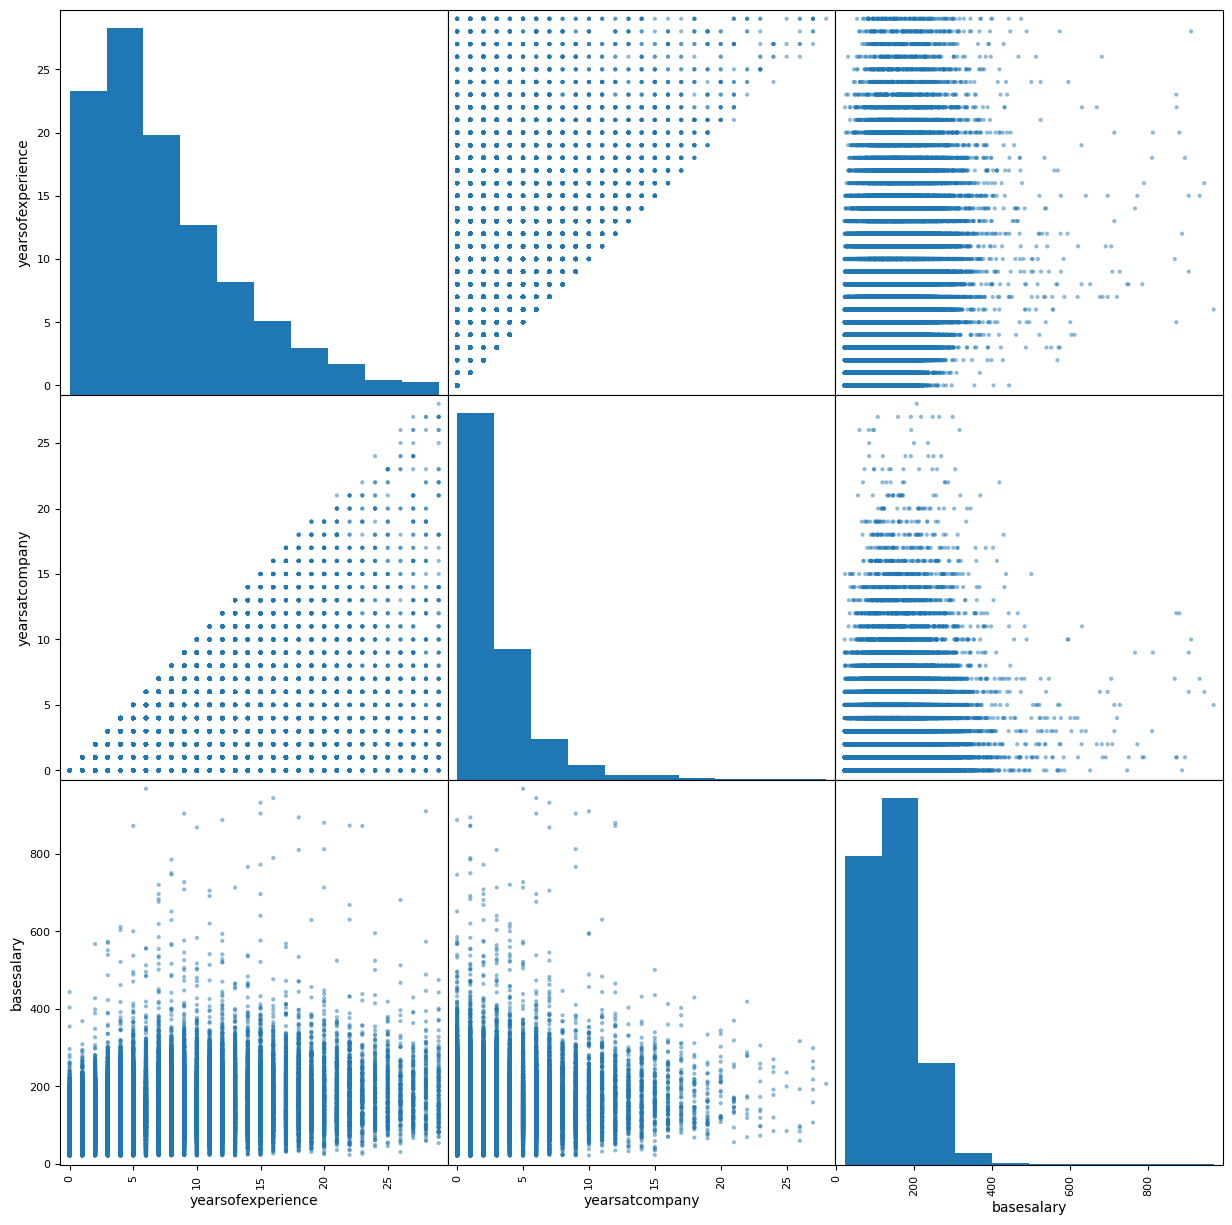

In [39]:
m = scatter_matrix(copy_df, figsize=(15, 15))

<h1>Preprocessor</h1>

In [40]:
# Create the preprocessor
preprocessor = ColumnTransformer([
        ("scaler", StandardScaler(), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

# preprocessor when I was adding a country feature
# preprocessor = ColumnTransformer([
#         ("scaler", StandardScaler(), 
#                 numeric_features),
#         ("nom", Pipeline([("country", InsertCountry()),
#             ("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
#                           ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
#                 nominal_features)],
#         remainder="passthrough")

In [41]:
# Features
dev_X = dev_df[features]
test_X = test_df[features]

# Target values
dev_y = dev_df["basesalary"].values
test_y = test_df["basesalary"].values

In [42]:
# we have enough data to make a training and validation set
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2)

<h1>Linear Regression</h1>

In [43]:
linear_model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())
])
linear_model.fit(dev_X, dev_y)

# Error estimation for the linear model.
np.mean(cross_val_score(linear_model, dev_X, dev_y, scoring="neg_mean_absolute_error", cv=ss))

-40.99509412829788

In [44]:
# overfitting
scores = cross_validate(linear_model, dev_X, dev_y, cv=ss, scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  34.678578212551216
Validation error:  40.99509412829788


<h1>Polynomial Regression</h1>
<p>I tried running this but it takes too long to get the MAE</p>

In [45]:
# quadratic_model = Pipeline([
#     ("preprocessor", preprocessor),
#     ("poly", PolynomialFeatures(degree=2, include_bias=False)),
#     ("predictor", LinearRegression())
# ])
# quadratic_model.fit(dev_X, dev_y)

# # Error estimation for the polynomial model.
# np.mean(cross_val_score(quadratic_model, dev_X, dev_y, scoring="neg_mean_absolute_error", cv=ss))

<h1>KNN</h1>

In [46]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN, I have found that n = 11 is the winner, so I increased n
# knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11]}
knn_param_grid = {"predictor__n_neighbors": [10, 11, 12]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 12}, -44.31007383053585)

In [47]:
# after running this, I found my model to be underfitting
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  41.13871904322412
Validation error:  44.31007383053585


<h1>Ridge Regression </h1>

In [53]:
# Create a pipeline that combines the preprocessor with ridge regression
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", Ridge())])

# Create a dictionary of hyperparameters for ridge regression
ridge_param_grid = {"predictor__alpha": [0, 30.0, 35.0, 40.0]}

# Create the grid search object which will find the best hyperparameter values based on validation error
ridge_gs = GridSearchCV(ridge, ridge_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
ridge_gs.fit(dev_X, dev_y)

# Let's see how well we did
ridge_gs.best_params_, ridge_gs.best_score_

({'predictor__alpha': 30.0}, -40.151727466413284)

In [49]:
# underfitting
ridge.set_params(**ridge_gs.best_params_) 
scores = cross_validate(ridge, dev_X, dev_y, cv=ss, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  39.72663094775386
Validation error:  40.151727466413284


<h1>Random Forest Regression</h1>
<p> Since my linear model was overfitting, I had an idea to use a decision tree like Random Forest Regressor, to try and improve accuracy and lessen overfitting</p>

<p> This runs very slow however, and takes too much time. Cost is high </p>

In [ ]:
# rfr = Pipeline([
#     ("preprocessor", preprocessor),
#     ("predictor", RandomForestRegressor())])
# rfr_param_grid = {"predictor__n_estimators": [10, 20, 30], "predictor__criterion":('squared_error','absolute_error'), "predictor__max_features":('sqrt','log2')}

# rfr_gs = GridSearchCV(rfr, rfr_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# rfr_gs.fit(dev_X, dev_y)

# rfr_gs.best_params, rfr_gs.best_score_

In [ ]:
# rfr.set_params(**rfr_gs.best_params_) 
# scores = cross_validate(rfr, dev_X, dev_y, cv=ss, 
#                         scoring="neg_mean_absolute_error", return_train_score=True)
# print("Training error: ", np.mean(np.abs(scores["train_score"])))
# print("Validation error: ", np.mean(np.abs(scores["test_score"])))

<h1>Evaluating on the Test Set</h1>
<p>Here I am using the linear and ridge models as I found both to have the lowest error out of all the models I tried</p>

In [51]:
mean_absolute_error(test_y, linear_model.predict(test_X))

41.084793199094136

In [55]:
mean_absolute_error(test_y, ridge_gs.predict(test_X))

40.34939963257376

<h1>Retraining on the entire dataset </h1>

In [63]:
linear_model.fit(df[features], df["basesalary"].values)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['yearsofexperience',
                                                   'yearsatcompany']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['company', 'level', 'title',
                                                   'location', 'tag',
                                                   'gender'])])),
                ('predictor', LinearRegression())])

In [64]:
ridge_gs.fit(df[features], df["basesalary"].values)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=2, test_size=None, train_size=0.75),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['yearsofexperience',
                                                                          'yearsatcompany']),
                                                                        ('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('binarizer',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['company',
                                                                          'level',
                                                                          'title',
                                                                          'location',
                                                                          'tag',
                                                                          'gender'])])),
                                       ('predictor', Ridge())]),
             param_grid={'predictor__alpha': [0, 30.0, 35.0, 40.0]},
             scoring='neg_mean_absolute_error')

<h2>Testing on real data (based on own profile)</h2>

In [69]:
test = {"company": ["johnson controls"],
       "yearsatcompany": [1],
       "yearsofexperience": [1],
       "level": ["intern"],
       "title": ["QA Engineer"],
       "gender": ["male"],
       "location": ["Cork, Ireland"],
       "tag": ["Mobile Dev / QA"]}
df_test = pd.DataFrame(test)

In [70]:
linear_model.predict(df_test)

array([26.60687671])

In [71]:
ridge_gs.predict(df_test)

array([69.06914305])